# Title: Heart Disease Prediction

`Author:` [Raaid Yousuf]()\
`Date:` 12.Sept.2025\
`Dataset:`[Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download) 


## Meta-Data (About Dataset)

### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type
   1. ypical angina 
   2. atypical angina 
   3. non-anginal 
   4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:` [normal; fixed defect; reversible defect]
* `num:` the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objectives

### Import Libraries

Let's start th eproject by importing all the libraries we will need in this project.

In [110]:
# Import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer from sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [111]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv') 

# display the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data  Analysis

### explore each column

In [112]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [113]:
# data shape
df.shape

(920, 16)

In [114]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [115]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

In [116]:
# lets summarize the age column and transpose the result
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

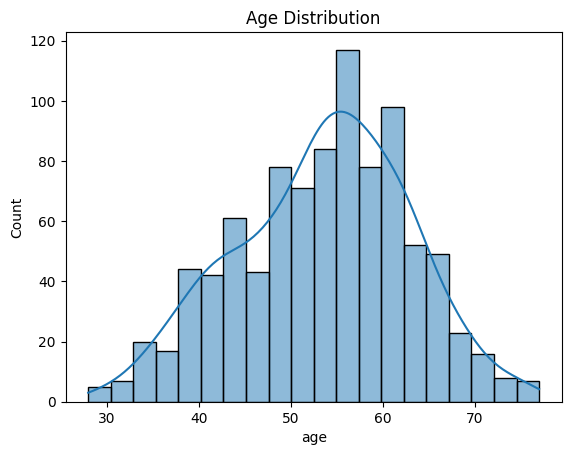

In [117]:
# draw a histogram plot for age column
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')

Mean age: 53.51086956521739
Median age: 54.0
Mode age: 54


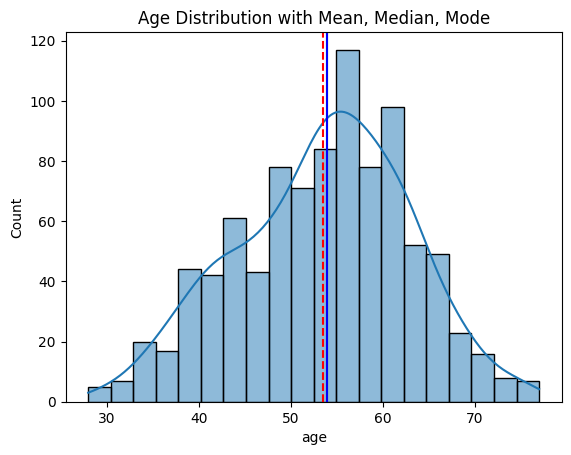

In [118]:
# plot the mean, median, mode on the histogram
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['age'].median(), color='g', linestyle='-', label='Median')
plt.axvline(df['age'].mode()[0], color='b', linestyle='-', label='Mode')
plt.title('Age Distribution with Mean, Median, Mode')

# print mean, median, mode of age column
print("Mean age:", df['age'].mean())
print("Median age:", df['age'].median())
print("Mode age:", df['age'].mode()[0])

let's explore the gender based distribution of the dataset for age column

In [119]:
# plot the histogram for age column using plotly and coloring this by gender
fig = px.histogram(df, x='age', color='sex' )
fig.show()

In [120]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [121]:
# calculate the percentage of male and female
male_count = 726
female_count = 194
total_count = male_count + female_count
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"Male percentage: {male_percentage:.2f}%")
print(f"Female percentage: {female_percentage:.2f}%")

Male percentage: 78.91%
Female percentage: 21.09%


In [122]:
# find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [123]:
# lets deal with the dataset column

df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [124]:
# find the unique value count of dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [125]:
# plot the count plot of dataset column
#sns.countplot(data=df, x='dataset', hue='sex')

# Better results with plotly
# using plotly to make the same plot
fig = px.bar(df, x='dataset', color='sex')
fig.show()

# get the value count of male and female in each dataset
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [126]:
# make a plot of age column using plotly and cooring by dataset column
fig = px.histogram(df, x='age', color='dataset', nbins=30, title='Age Distribution by Dataset')
fig.show()

# print the mean median and mode of age column group by dataset column
df.groupby('dataset')['age'].agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda_0>': 'mode'})

,mean,median,mode
dataset,,,
Cleveland,54.351974,55.5,58
Hungary,47.894198,49.0,54
Switzerland,55.317073,56.0,61
VA Long Beach,59.350000,60.0,62


### Lets explore cp (Chest Pain) column 

In [127]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [128]:
df.groupby('cp')['sex'].value_counts()


cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      151
                 Female     53
typical angina   Male       36
                 Female     10
Name: count, dtype: int64

In [129]:
df.groupby('cp')['dataset'].value_counts()

cp               dataset      
asymptomatic     Cleveland        144
                 VA Long Beach    131
                 Hungary          123
                 Switzerland       98
atypical angina  Hungary          105
                 Cleveland         51
                 VA Long Beach     14
                 Switzerland        4
non-anginal      Cleveland         86
                 Hungary           54
                 VA Long Beach     47
                 Switzerland       17
typical angina   Cleveland         23
                 Hungary           11
                 VA Long Beach      8
                 Switzerland        4
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

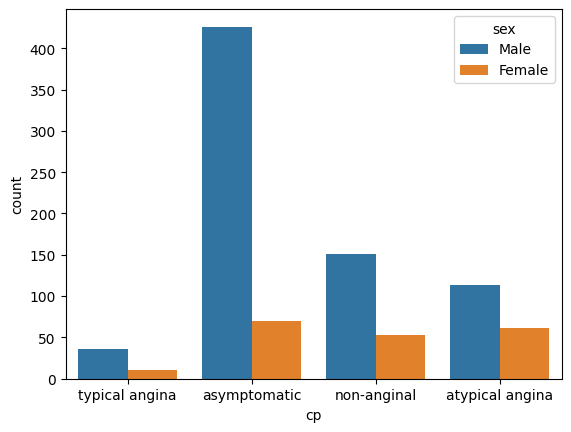

In [130]:
# count plot of cp column by sex column
sns.countplot(data=df, x='cp', hue='sex')


<Axes: xlabel='cp', ylabel='count'>

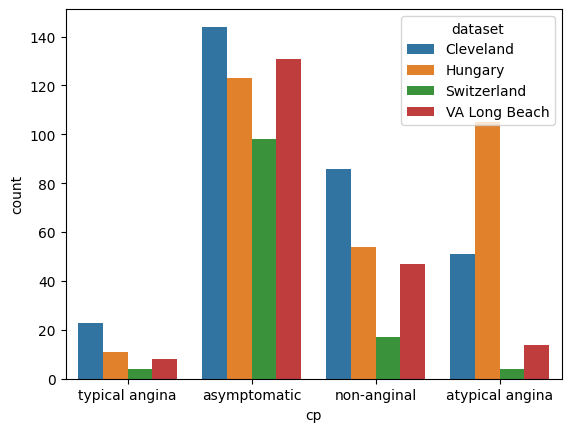

In [131]:
# count plot of cp column by dataset column
sns.countplot(data=df, x='cp', hue='dataset')

In [132]:
# draw the plot of age column grouped by cp column
fig = px.histogram(df, x='age', color='cp')
fig.show()

### Lets explore the trestbps (resting blood pressure) column.

The normal resting blood pressure is 120/80 mm Hg. 

In [133]:
# find the value counts of trestbps
df['trestbps'].describe()


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

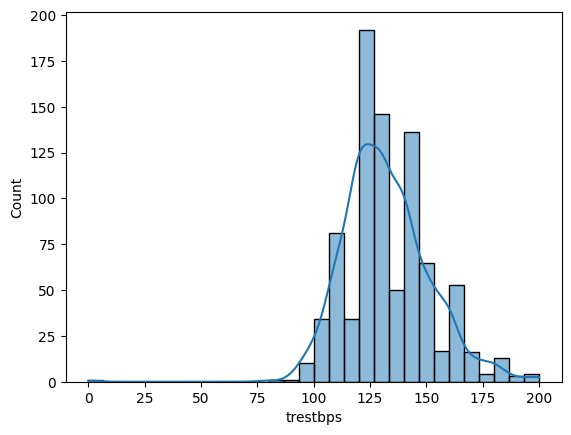

In [134]:
# craete a histplot of trestbps column
sns.histplot(data=df, x='trestbps', bins=30, kde=True)

<span style="color:gold; font-weight:bold; font-size:28px"> Dealing with missing values</span>

# we are going to make a function to deal with missing values

In [135]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [136]:
categorical_columns = ['thal','ca','slope','exang',"restecg",'fbs','cp','sex','num']
bool_cols = ['fbs','exang']
numerical_cols = ['age','trestbps','chol','thalch','oldpeak']

In [137]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, ), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [138]:
# check the missing values
df.isnull().sum()[df.isnull().sum() > 0]

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [139]:
# remove warnings
warnings.filterwarnings("ignore")

for col in missing_data_cols:
    print("Missing values", col,":", str(round((df[col].isnull().sum()/len(df))*100,2))+"%")
    if col in categorical_columns:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing values trestbps : 6.41%
MAE = 13.291271676300576 

RMSE = 296.08843179190757 

R2 = 0.07551634542076702 

Missing values chol : 3.26%
MAE = 44.745224719101124 

RMSE = 4048.1019376404493 

R2 = 0.6793213211510164 

Missing values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing values restecg : 0.22%
The feature 'restecg' has been imputed with 66.85 accuracy

Missing values thalch : 5.98%
MAE = 16.749826589595376 

RMSE = 464.558914450867 

R2 = 0.32449259876461467 

Missing values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing values oldpeak : 6.74%
MAE = 0.5616220930232558 

RMSE = 0.6106480290697675 

R2 = 0.41823323752836716 

Missing values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [140]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<span style="color:gold; font-weight:bold; font-size:28px"> Dealing with Outliers</span>

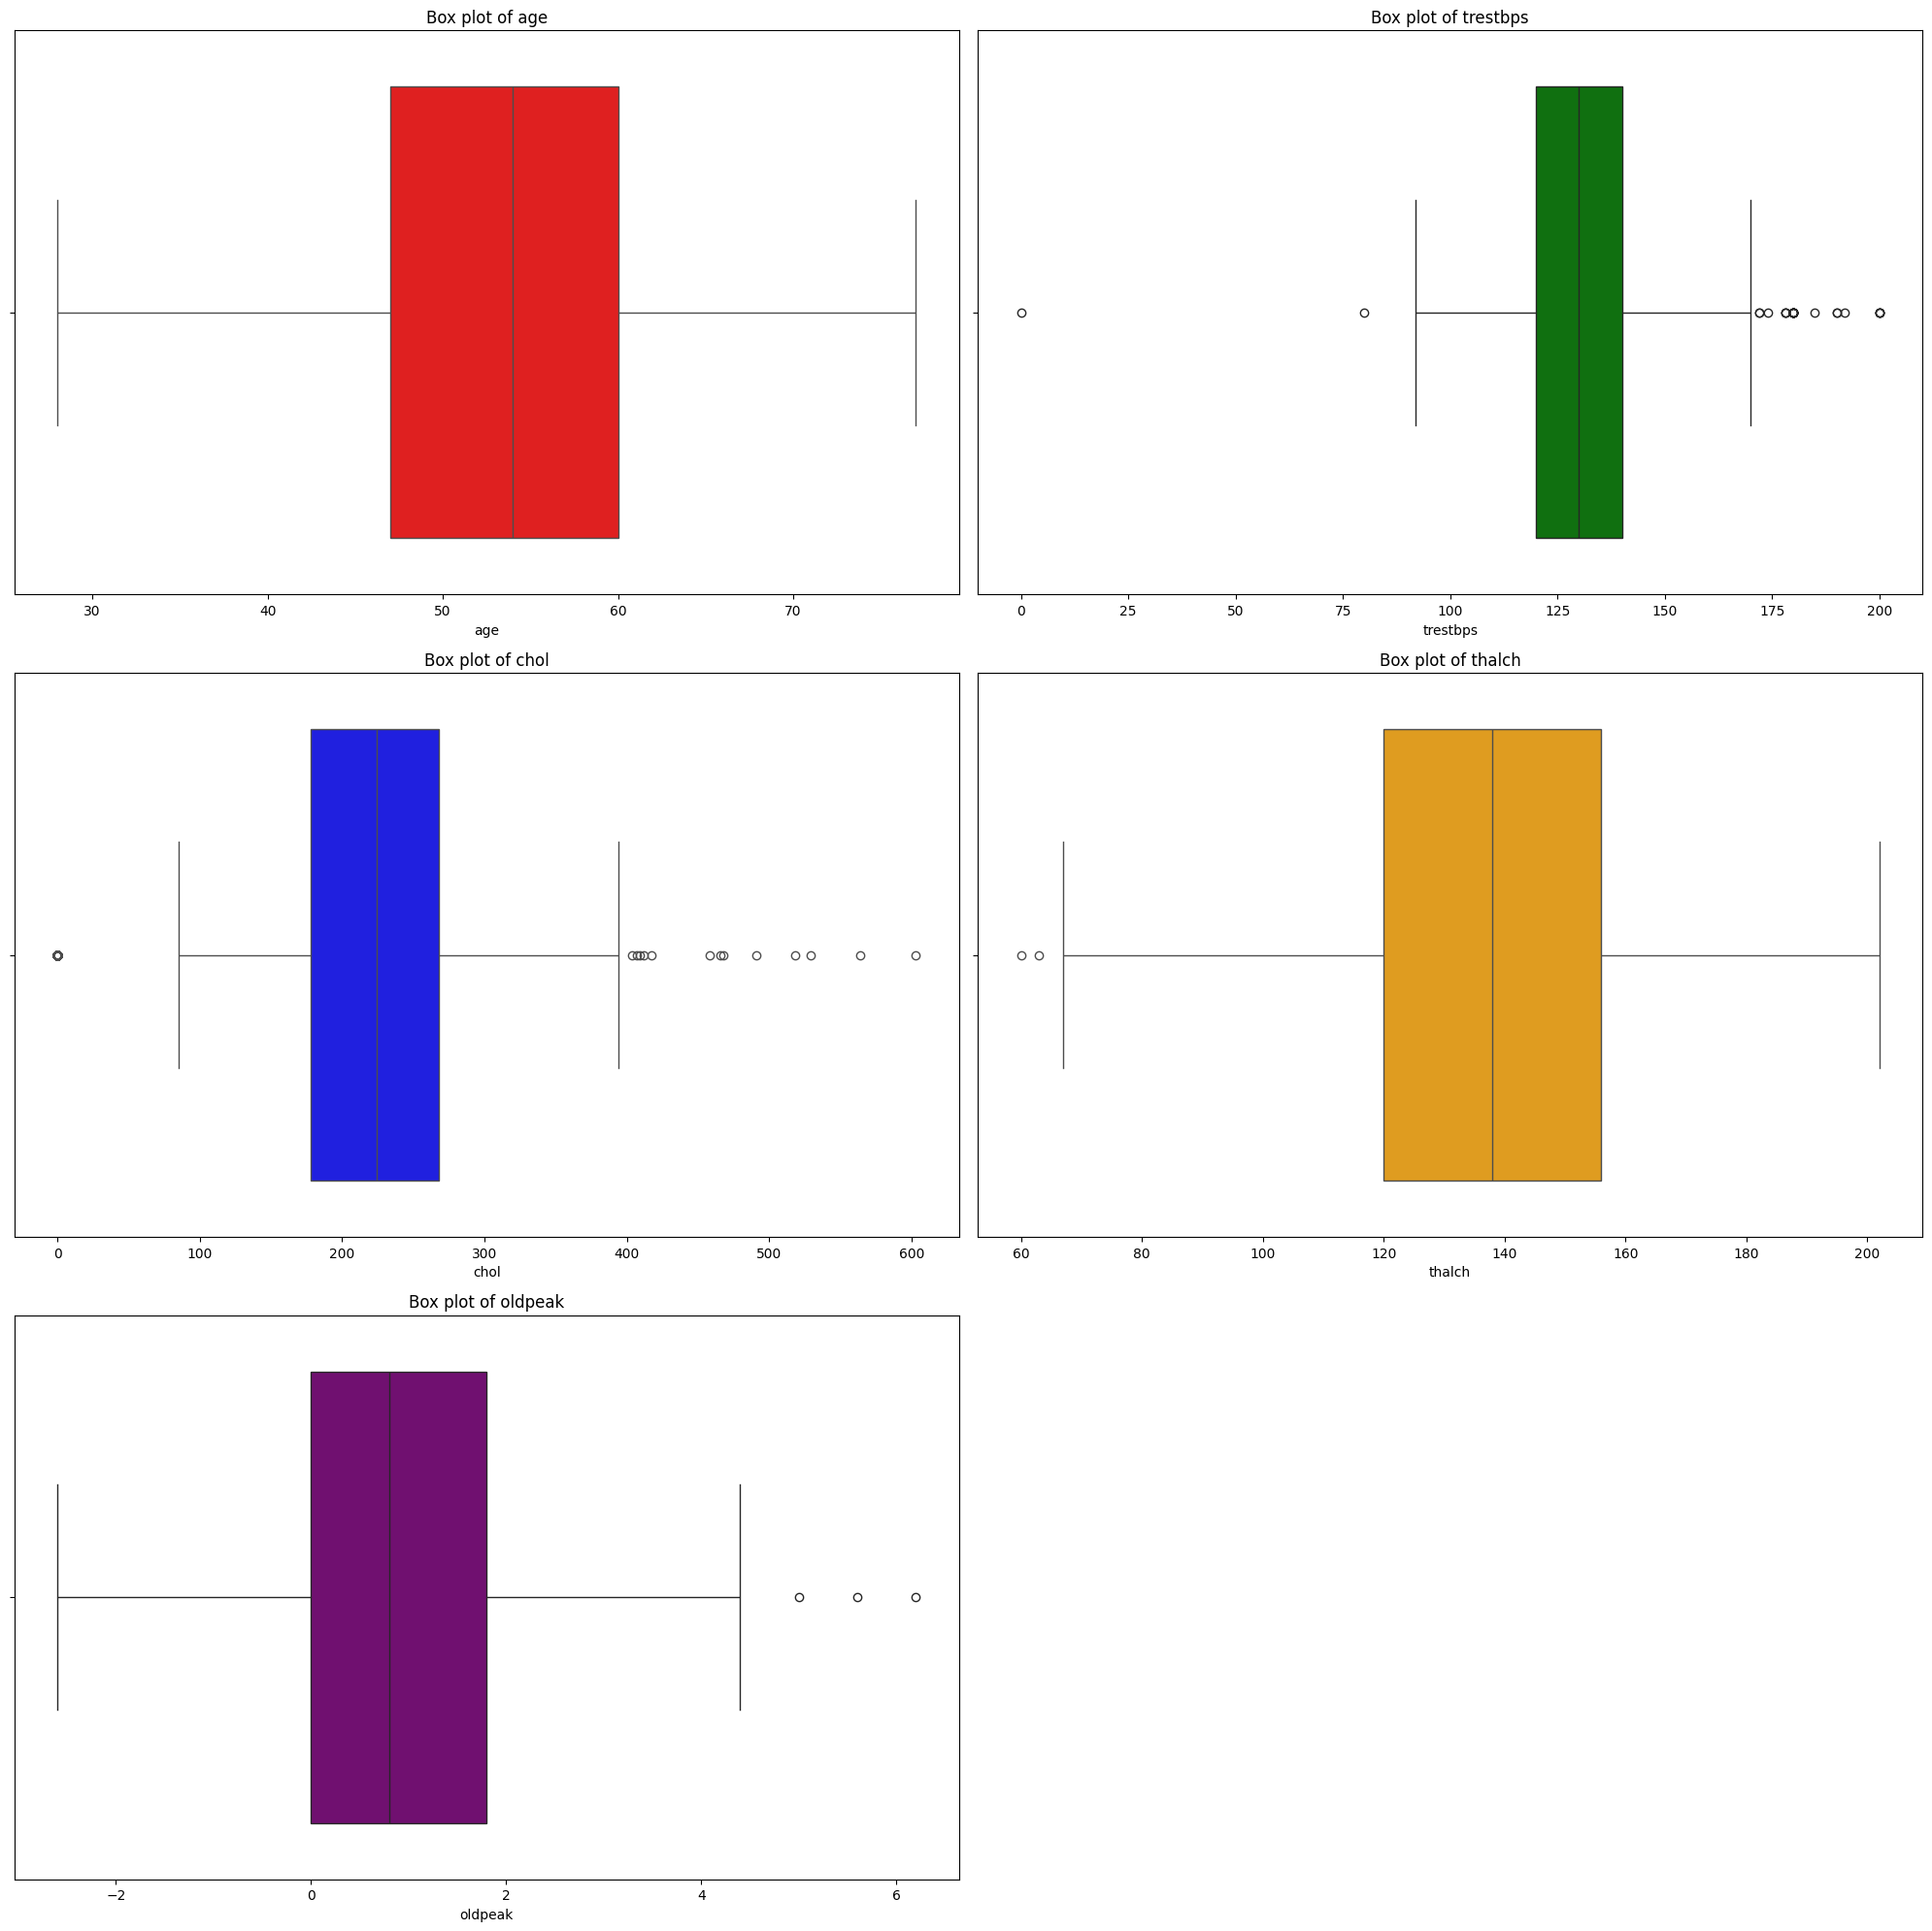

In [143]:
# create a box plot for all numeric columns using for loop and subplot
plt.figure(figsize=(20,20))

colors =['red','green','blue','orange','purple']

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x=col, color=colors[i % len(colors)])
    plt.title(f'Box plot of {col}')
    plt.tight_layout()
plt.show()

In [150]:
# draw box plots for numerical column using plotly and for loop
for col in numerical_cols:
    fig = px.box(df, y=col, title=f'Box plot of {col}')
    fig.show()

In [148]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]

# remove this row from data
df = df[df['trestbps'] != 0]

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [152]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [156]:
# groupby sex column with trestbps
df.groupby('sex')['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,194.0,132.151907,19.421092,94.0,120.0,130.0,140.00,200.0
Male,725.0,132.634800,17.618907,80.0,120.0,130.0,140.46,200.0


In [160]:
# groupby chol column with sex column
df.groupby('sex')['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,194.0,240.597371,84.85351,0.0,204.25,240.5,288.0,564.0
Male,725.0,190.245352,112.64279,0.0,164.00,221.0,263.0,603.0


In [161]:
# draw a histogram plot for chol column and color by sex
fig = px.histogram(df, x='chol', color='sex')
fig.show()

In [162]:
# draw a histogram plot for trestbps column and color by sex
fig = px.histogram(df, x='trestbps', color='sex')
fig.show()

In [164]:
fig = px.histogram(df, x='chol', color='dataset')
fig.show()

<span style="color:gold; font-weight:bold; font-size:28px"> Machine Learning</span>

In [165]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [166]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The traget Column is `num` which is the predicted attribute. We wiil use this column to predict the heart disease.
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0= no heart disease`
* `1= mild heart disease `
* `2= moderate heart disease  `
* `3 = severe heart disease `
* `4= critical heart disease  `

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [168]:
# split the data into x and y
X = df.drop('num', axis=1)
y = df['num']

# encode x data using for loop for all categorical columns and save it for inverse transform
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
    else:
        pass

# split the data in train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multiclass classification

1. Logistic Regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGboost
8. LightGBM
9. AdaBoost
10. Gradient boost classifier

In [172]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [183]:
# create a function to train and evaluate all the model

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }

best_model = None
best_accuracy = 0

for name, model in models.items():
    # create a pipeline for each model
    pipeline = Pipeline([
        ('classifier', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # print the performance metrics
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print( )

    # check if current model has best accuracy score
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
    
# Retrieve the best model
print("Best Model: ", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('best_model.pkl', 'wb'))



Model: Logistic Regression
Cross-Validation Accuracy: 0.5184
Test Accuracy: 0.5000

Model: Decision Tree
Cross-Validation Accuracy: 0.6354
Test Accuracy: 0.6196

Model: Random Forest
Cross-Validation Accuracy: 0.6707
Test Accuracy: 0.6522

Model: Gradient Boosting
Cross-Validation Accuracy: 0.6707
Test Accuracy: 0.6902

Model: AdaBoost
Cross-Validation Accuracy: 0.6694
Test Accuracy: 0.6304

Model: SVC
Cross-Validation Accuracy: 0.5837
Test Accuracy: 0.5815

Model: XGBoost
Cross-Validation Accuracy: 0.6558
Test Accuracy: 0.6467

Model: KNeighbors
Cross-Validation Accuracy: 0.5837
Test Accuracy: 0.5924

Model: Naive Bayes
Cross-Validation Accuracy: 0.5796
Test Accuracy: 0.5489

Best Model:  Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])


#### Outputs:
1. The minimum age to have a heart disease starts from 28 years old
2. Most of the people get heart diseases from 53 to 54 years old.
3. Most of the males and females are with heart disease at the age of 54 to 55 years.
4. Male percentage in the data 78.91%
5. Female percentage in the data 21.09%
6. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
    1. The highest number of females in the dataset are from Cleveland (97) and the lowest from VALong Beach (6).
    2. The highest number of males inn this dataset are from Hungary (212) and lowest from Switzerland (113)
7. The mean, median and mode values while grouping age and dataset column show completely different values.
8. The most number of chest pain type in people is asymptomatic (496).
    1. The highest type of chest pain in male is asymptomatic (426) and lowest is typical angina (36).
    2. The highestt type of chest pain in female is asymptomatic (70) and lowest type is typicla angina (10).
9. Steps to Impute Missing Values
    1. Import Libraries
    2. Load the data
    3. find the columns with missing values and store in object
    4. find the column based on data types
        1. numeric
        2. categories
        3. Boolean
    5. Find the function to impute missing values
    6. apply the function to our dataset with missing values
    7. check the missing values agfter imputation
    8. We used Random forest regressor to impute all the numerical columns while used random forest classifier to impute ll the categorical, object and boolean columns.
 10. We drew box plots for all the numerical columns and only found out 1 outlier where the value of trestbps was 0, that particular row was removed. We founf none other outliers in the dataset.
